          PL Intensity (kcps)
Time (s)                     
5.71                      4.1
5.72                      4.8
5.73                      4.1
5.74                      4.8
5.75                      3.0


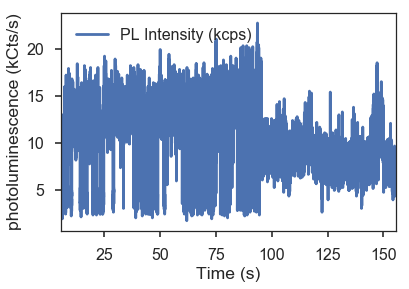

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 27 17:17:43 2018

Blinker analysis

@author: Viva Horowitz
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
sns.set(style='ticks')
sns.set_context('poster')

datadate = '2018-05-31'
datafolder = r'O:\User\Viva\data\2018-05-31_blinking-statistics'
filename = '100HzPLvstime4-21-2018.11,00am.txt'
analysisfolder = r'O:\User\Viva\analysis\blinker_analysis'

os.chdir(datafolder)

tname = 'Time (s)'
PLname = 'PL Intensity (kcps)'

data = pd.read_csv(filename,
                   skiprows=1,
                   header=None,
                   sep='\t',
                   names=['Time (s)','PL Intensity (kcps)'],
                   usecols=[0,1])

data = data.set_index(tname)
print(data.head())

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
plt.show()


os.chdir(analysisfolder)
today = datetime.date.isoformat(datetime.date.today())
if not os.path.exists('taken-' + datadate):
    os.makedirs('taken-' + datadate)
os.chdir('taken-' + datadate)

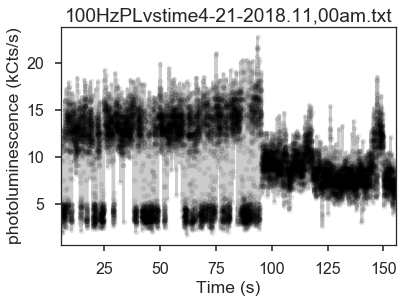

In [2]:
fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

plt.savefig(today + ',' + filename+'blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinking.png', bbox_inches='tight', dpi=200)

plt.show()

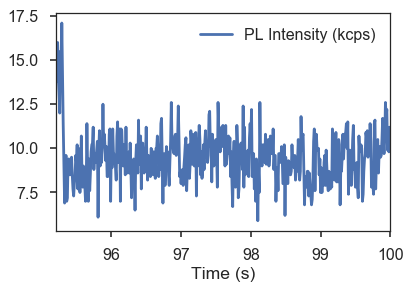

In [3]:
datatrim = data[95.2:100]

datatrim.plot()
plt.show()

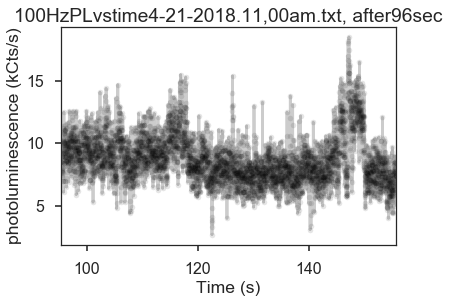

In [4]:
data=data[95.4:]
filename = filename + ', after96sec'

fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.title(filename)

plt.savefig(today + ',' + filename+'blinking.pdf', bbox_inches='tight')
plt.savefig(today + ',' + filename+'blinking.png', bbox_inches='tight', dpi=200)

plt.show()

In [5]:
# The data was collected at a particular rate
timesetting = data.index[1]-data.index[0]
fps = 1/timesetting
timesetting

0.0099999999999909051

In [6]:
binsequence = np.arange(data.min(), data.max(), fps/350)
len(binsequence)

56

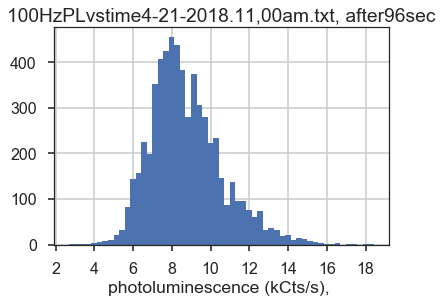

In [37]:
data.hist(bins= binsequence)
plt.xlabel('photoluminescence (kCts/s), ')
plt.locator_params(axis='x', nbins=10)
ax = plt.gca()

plt.title(filename)

# Need to pick an appropriate threshold between on and off. 
uthreshold = 8
lthreshold = uthreshold-.5

#ax.axvline(x=uthreshold, color='k')
#ax.axvline(x=lthreshold, color = 'k')
#ax.tick_params(axis='x',which='minor',bottom='on')
#ax.xaxis.set_minor_locator(minorLocator)
plt.show()

In [8]:
data.head()

,PL Intensity (kcps)
Time (s),
95.40,8.5
95.41,9.3
95.42,8.5
95.43,9.5
95.44,8.5


In [9]:
data.count()

PL Intensity (kcps)    6031
dtype: int64